In [138]:
import funzioni02 as f2
import numpy as np
from sympy.physics.quantum import TensorProduct as Tp
from sympy import *
from qiskit import Aer, assemble, QuantumCircuit, QuantumRegister, ClassicalRegister, IBMQ, transpile, execute


In [108]:
steps=10
tempo=np.pi
precision=40

U = f2.Trotter_N_approx(steps=steps, tempo=tempo, precision=precision)

gate_1, gate_2 = f2.simplyfied_gates_matricies(U, precision=precision)
U

Matrix([
[0.9999999999999999999999999999993293232334 + 1.158168180023633186279953076553945918866e-15*I,                                                                                           0,                                                                                            0,                                                                                            0,                                                                                            0,                                                                                            0,                                                                                           0,                                                                                            0],
[                                                                                           0,   0.9667312987322532344534245173901515065398 + 0.0880123368057350284591852185706006613749*I, -0.07928270788387310503819045035869728517396 + 0.08

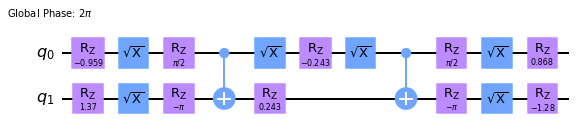

In [109]:

### building gate_1 cirquit

qc_aus=QuantumCircuit(2, name="gate_1")
qc_aus.unitary(gate_1, [0,1])

gate_1_c=transpile(qc_aus,basis_gates=["cx","rz","x","sx"])

### building gate_2 cirquit

qc_aus=QuantumCircuit(2, name="gate_2")
qc_aus.unitary(gate_2, [0,1])

gate_2_c=transpile(qc_aus,basis_gates=["cx","rz","x","sx"])


gate_1_c.draw(output="mpl")

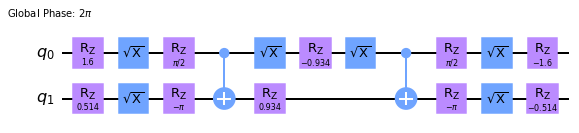

In [110]:
gate_2_c.draw(output="mpl")

In [111]:
f2.matrix_from_cirquit(gate_1_c, phase=0)

Matrix([
[1.0,                        0,                       0,   0],
[  0,  0.9667313 - 0.0880123*I, 0.1891979 + 0.1479479*I,   0],
[  0, -0.1891979 + 0.1479479*I, 0.9667313 + 0.0880123*I,   0],
[  0,                        0,                       0, 1.0]])

In [112]:
gate_1

Matrix([
[1.0,                                                                                          0,                                                                                          0,   0],
[  0, 0.9667312987322532348783898226933982142132 - 0.08801233680573479288797125859657521744009*I,  0.1891978768125134074812757831259128537568 + 0.1479479233753615659244507296322665943717*I,   0],
[  0, -0.1891978768125134074812757831259128537568 + 0.1479479233753615659244507296322665943717*I, 0.9667312987322532348783898226933982142132 + 0.08801233680573479288797125859657521744009*I,   0],
[  0,                                                                                          0,                                                                                          0, 1.0]])

In [113]:
f2.matrix_from_cirquit(gate_2_c, phase=0)

Matrix([
[1.0,                       0,                        0,   0],
[  0,               0.5948873, -0.7115024 - 0.3739967*I,   0],
[  0, 0.7115024 - 0.3739967*I,                0.5948873,   0],
[  0,                       0,                        0, 1.0]])

In [114]:
gate_2

Matrix([
[1.0,                                                                                         0,                                                                                          0,   0],
[  0,                                                0.5948872738310561312710039956601613894949, -0.7115023716117614855193645263097176738916 - 0.3739966665956969499157828050089876682942*I,   0],
[  0, 0.7115023716117614855193645263097176738916 - 0.3739966665956969499157828050089876682942*I,                                                 0.5948872738310561312710039956601613894949,   0],
[  0,                                                                                         0,                                                                                          0, 1.0]])

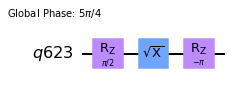

In [115]:
qr=QuantumRegister(1)
qc=QuantumCircuit(qr)

qc.h(qr)
qc.rz(np.pi/2,qr)

qc=transpile(qc,basis_gates=["cx","rz","x","sx"])
qc.draw(output="mpl")

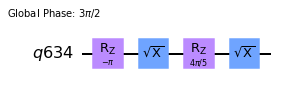

In [116]:
qr=QuantumRegister(1)
qc=QuantumCircuit(qr)

qc.ry(np.pi/5,qr)

qc=transpile(qc,basis_gates=["cx","rz","x","sx"])
qc.draw(output="mpl")

In [247]:
steps=12
tempo=np.pi
precision=40

U = f2.Trotter_N_approx(steps=steps, tempo=tempo, precision=precision)

gate_1, gate_2 = f2.simplyfied_gates_matricies(U, precision=precision)

a_1 = float(f2.angolo(re(gate_1[1*4+1]),im(gate_1[1*4+1]))+f2.angolo(re(gate_1[4*1+2]),im(gate_1[4*1+2])))/2
a_2 = float(f2.angolo(re(gate_1[1*4+1]),im(gate_1[1*4+1]))-a_1)
a_3 = float(acos(Abs(gate_1[1*4+1])))

print(a_1,a_2,a_3)

0.362657636598644 -0.4283405974346203 0.16618014598678296


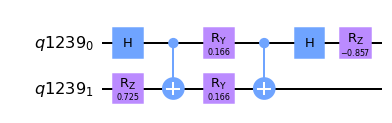

In [257]:
qr=QuantumRegister(2)
qc=QuantumCircuit(qr)

qc.rz(a_1*2,qr[1])
qc.h(qr[0])
qc.cx(qr[0],qr[1])
qc.ry(a_3,qr[0])
qc.ry(a_3,qr[1])
qc.cx(qr[0],qr[1])
qc.h(qr[0])
qc.rz(a_2*2,qr[1])

qc.draw(output="mpl")

In [252]:
gate_1

Matrix([
[1.0,                                                                                          0,                                                                                          0,   0],
[  0, 0.9840971827507021375629491983097934880968 - 0.06473153286603603187067957989294107122124*I,  0.1163101573054763009830111669810050615753 + 0.1176201975109709383638641500062290917734*I,   0],
[  0, -0.1163101573054763009830111669810050615753 + 0.1176201975109709383638641500062290917734*I, 0.9840971827507021375629491983097934880968 + 0.06473153286603603187067957989294107122124*I,   0],
[  0,                                                                                          0,                                                                                          0, 1.0]])

In [258]:
f2.matrix_from_cirquit(qc, phase=0)

Matrix([
[0.9978436 + 0.0656357*I,                       0,                        0,                       0],
[                      0, 0.6934493 - 0.7012599*I, -0.1650596 + 0.0108572*I,                       0],
[                      0, 0.1650596 + 0.0108572*I,  0.6934493 + 0.7012599*I,                       0],
[                      0,                       0,                        0, 0.9978436 - 0.0656357*I]])

In [241]:
a, r1, r2 = symbols("a r1 r2")

H = Matrix([ 
    [1/sqrt(2),1/sqrt(2)],
    [1/sqrt(2),-1/sqrt(2)]
])

cx_01= Matrix([
    [1,0,0,0],
    [0,0,0,1],
    [0,0,1,0],
    [0,1,0,0]
])

cx_10= Matrix([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,0,1],
    [0,0,1,0]
])

def ry(alpha):
    return Matrix([ 
        [cos(alpha/2),-sin(alpha/2)],
        [sin(alpha/2),cos(alpha/2)]
    ])

def rz(alpha):
    return Matrix([ 
        [exp(-1j*(alpha/2)),0],
        [0,exp(1j*(alpha/2))]
    ])


In [246]:
M=simplify(Tp(eye(2),rz(2*r1))*Tp(H,eye(2))*cx_10*Tp(ry(a),ry(a))*cx_10*Tp(H,eye(2))*Tp(eye(2),rz(2*r2)))
M

Matrix([
[exp(1.0*I*(-r1 - r2)),                             0,                            0,                    0],
[                    0,   exp(1.0*I*(r1 + r2))*cos(a),  exp(1.0*I*(r1 - r2))*sin(a),                    0],
[                    0, -exp(-1.0*I*(r1 - r2))*sin(a), exp(-1.0*I*(r1 + r2))*cos(a),                    0],
[                    0,                             0,                            0, exp(1.0*I*(r1 + r2))]])